In [1]:
%matplotlib inline
import math 
import time 
import numpy as np
import torch 
from d2l import torch as d2l


In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [7]:
a, b

(tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [5]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
        
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.09530 sec'

In [8]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

In [9]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

In [10]:
x = np.arange(-7, 7, 0.01)

In [11]:
x

array([-7.  , -6.99, -6.98, ...,  6.97,  6.98,  6.99])

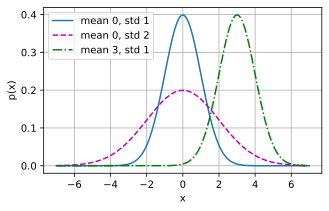

In [12]:
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], 
         xlabel = 'x', ylabel = 'p(x)', figsize=(5, 3), 
         legend = [f'mean {mu}, std {sigma}' for mu, sigma in params])